In [20]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
X_test.shape

(10000, 28, 28)

In [23]:
y_test.shape

(10000,)

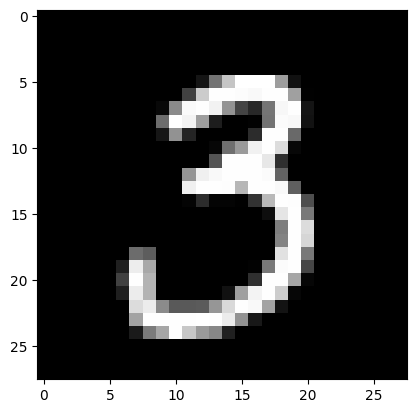

In [24]:
plt.imshow(X_test[90], cmap="gray")

In [25]:
y_test[90]

3

In [26]:
X = X_test.reshape(-1, 28*28)
y = y_test

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ = sc.fit_transform(X)

In [31]:
X_.shape

(10000, 784)

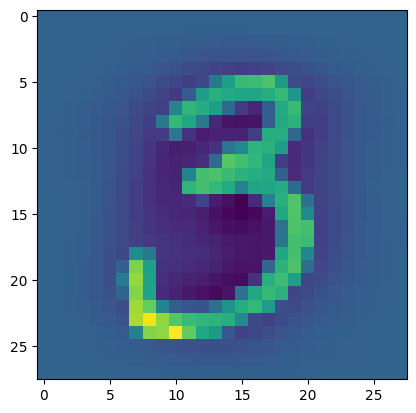

In [ ]:
plt.imshow(X_[90].reshape(28, 28))

In [48]:
#PCA using sklearn
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=2)

In [50]:
z_pca = pca.fit_transform(X_)

In [51]:
z_pca.shape

(10000, 2)

In [52]:
z_pca

array([[-5.45831116,  6.41400668],
       [ 2.80443233, -8.02885014],
       [-7.41124146, -3.86404387],
       ...,
       [-5.00435204,  1.15364641],
       [-1.42085442, -4.42308066],
       [13.14268302, -4.26280299]])

In [53]:
pca.explained_variance_

array([41.39893398, 28.35105808])

In [55]:
#Custom PCA
import numpy as np

In [56]:
covar = np.dot(X_.T, X_)

In [57]:
covar.shape

(784, 784)

In [58]:
from numpy.linalg import svd

In [59]:
U, S, V = svd(covar)

In [61]:
U.shape

(784, 784)

In [62]:
Ured = U[:, :2]

In [63]:
Ured.shape

(784, 2)

In [64]:
Z = np.dot(X_, Ured)

In [65]:
Z.shape

(10000, 2)

In [66]:
Z

array([[  5.45831116,   6.41400668],
       [ -2.80443233,  -8.02885014],
       [  7.41124146,  -3.86404387],
       ...,
       [  5.00435204,   1.15364641],
       [  1.42085442,  -4.42308066],
       [-13.14268302,  -4.26280299]])

In [75]:
#Visualization
import pandas as pd

In [76]:
new_dataset = np.hstack((Z, y.reshape(-1, 1)))

In [77]:
dataframe = pd.DataFrame(new_dataset, columns=["PC1", "PC2", "Label"])

In [78]:
dataframe.head()

,PC1,PC2,Label
0,5.458311,6.414007,7.0
1,-2.804432,-8.028850,2.0
2,7.411241,-3.864044,1.0
3,-8.751242,0.045991,0.0
4,0.065756,6.296290,4.0


<Figure size 1500x1500 with 0 Axes>

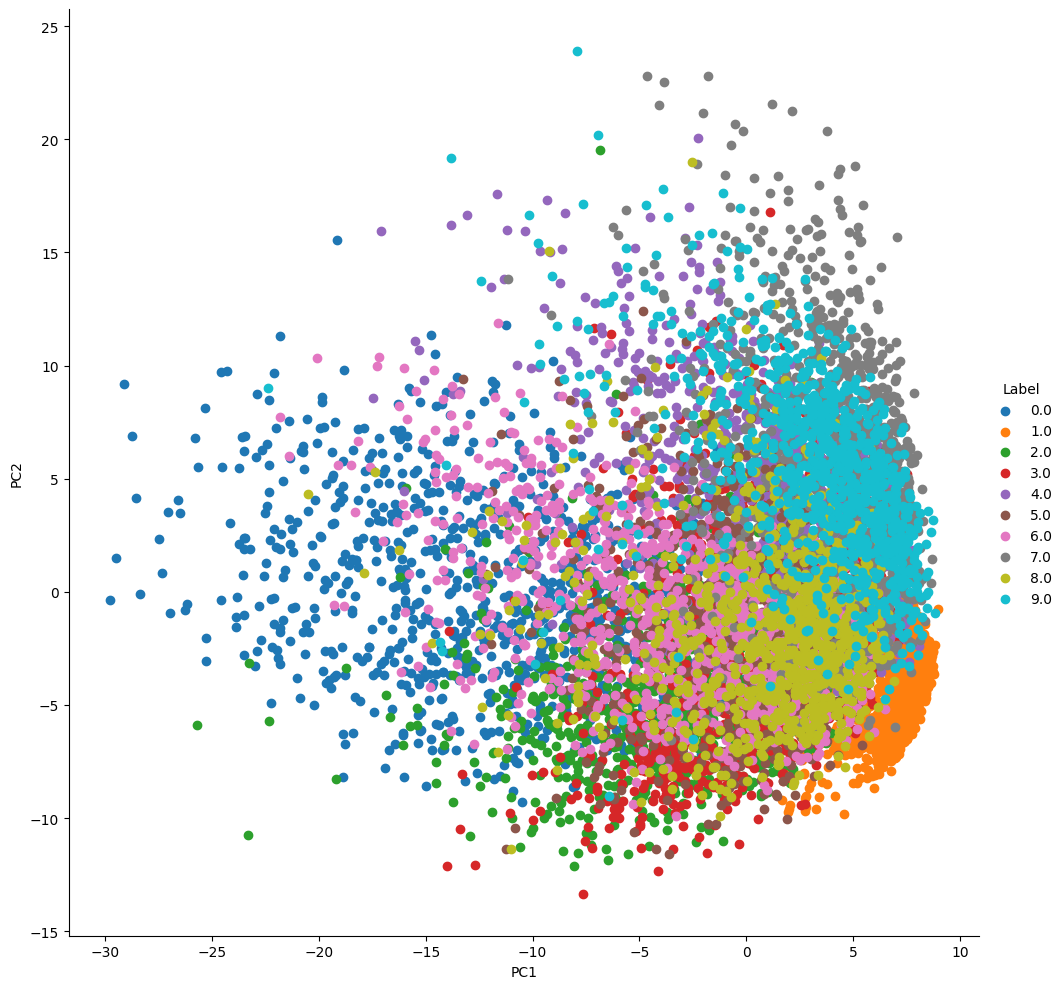

In [79]:
import seaborn as sns
plt.figure(figsize=(15, 15))
fg = sns.FacetGrid(dataframe, hue="Label", height=10)
fg.map(plt.scatter, "PC1", "PC2")
fg.add_legend()
plt.show()

In [80]:
pca = PCA()
Z_pca = pca.fit_transform(X_)
Z_pca.shape

(10000, 784)

In [81]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

In [82]:
cum_var_explained

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

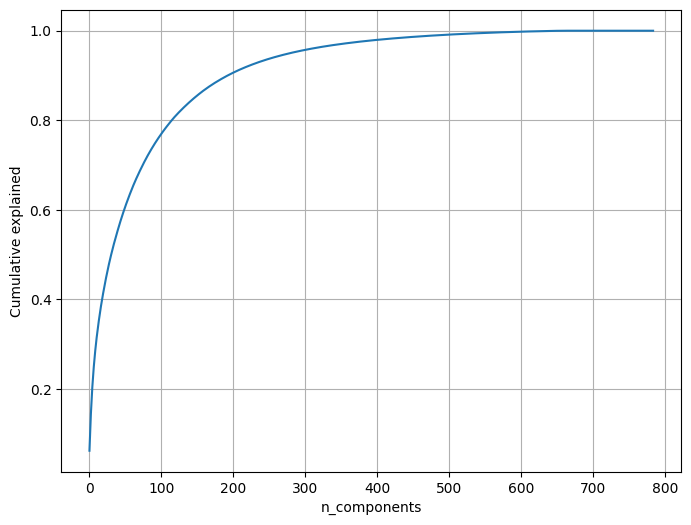

In [86]:
plt.figure(figsize=(8, 6))
plt.plot(cum_var_explained)
plt.xlabel("n_components")
plt.ylabel("Cumulative explained")
plt.grid()
plt.show()